# KNN Classification

## Importing libraries

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
#Reading a csv file
df = pd.read_csv('titanic_cleaned.csv')

In [3]:
#Dimension of the dataframe
df.shape

(891, 25)

In [4]:
#First 10 rows of the dataframe
df.head(10)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
5,0,29.699118,8.4583,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
6,0,54.000000,51.8625,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
7,0,2.000000,21.0750,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
8,1,27.000000,11.1333,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
9,1,14.000000,30.0708,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [5]:
#Data type of all columns
df.dtypes

Survived        int64
Age           float64
Fare          float64
Pclass_1        int64
Pclass_2        int64
Pclass_3        int64
Sex_female      int64
Sex_male        int64
SibSp_0         int64
SibSp_1         int64
SibSp_2         int64
SibSp_3         int64
SibSp_4         int64
SibSp_5         int64
SibSp_8         int64
Parch_0         int64
Parch_1         int64
Parch_2         int64
Parch_3         int64
Parch_4         int64
Parch_5         int64
Parch_6         int64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
dtype: object

In [6]:
#Check for a missing values 
df.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

## Segragating Variables : Independent variables and Dependent variables

In [7]:
#Seperating Independent and Dependent variables
X = df.drop('Survived', axis=1)
y = df['Survived']

## Scaling the data(Using the MinMaxScaler)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [9]:
#Viewing first 5 rows after scaling
X.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Splitting the dataset into Training set and testing set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Implement KNN Classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
#Creating an instance of KNN
knn = KNeighborsClassifier(n_neighbors=10)

In [13]:
#Fitting the model to the Training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

## Making Predictions

In [14]:
y_pred = knn.predict(X_test)

## Evaluate the model

In [15]:
from sklearn.metrics import accuracy_score, f1_score

In [16]:
print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("F1-Score : ", f1_score(y_test, y_pred))

Accuracy Score :  0.7821229050279329
F1-Score :  0.6776859504132232


## Using of Elbow method to find optimum value of K

In [17]:
#Creating a function which runs on every no of K and calculalte an error
def elbow(k):
    #Creating empty list 
    test_error = []
    
    #Train a model for every value of K
    for i in k:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        temp = knn.predict(X_test)
        score = f1_score(y_test, temp)
        error = 1 - score
        test_error.append(error)
    return test_error

In [18]:
#Defining K range
k = range(1, 14, 2)

In [19]:
#Call elbow function
test = elbow(k)

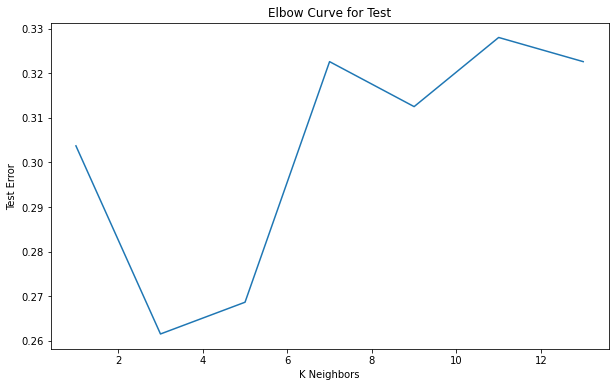

In [20]:
#Plotting the curves
plt.figure(figsize=(10, 6))
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Error')
plt.title('Elbow Curve for Test')
plt.show()

We can see that optimum number of K is 3. Now we create a KNN model by setting n_neighbors=3.

In [21]:
#Creating an instance of KNN
knn = KNeighborsClassifier(n_neighbors=3)

In [22]:
#Fitting a model to the train data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
#Make predictions for test data
y_pred = knn.predict(X_test)

In [24]:
#Calculating f1_score and Accuracy
print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("F1-Score : ", f1_score(y_test, y_pred))

Accuracy Score :  0.8100558659217877
F1-Score :  0.7384615384615385


We can see that accuracy and f1 score have improved.